<a href="https://colab.research.google.com/github/GuhNasc/Data-Science/blob/main/Analise_dos_crimes_do_estado_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando os crimes do Rio De Janeiro

Todos nos sabemos que a violência no Brasil vem crescendo cada vez mais , de acordo com o G1 [Link](https://g1.globo.com/monitor-da-violencia/noticia/2020/11/19/brasil-tem-alta-de-4percent-no-numero-de-assassinatos-nos-primeiros-nove-meses-do-ano.ghtml) houve um aumento de 4% no número de assassinatos somente nos 9 primeiros meses do ano de 2020 , isso mostra como nosso país vem se tornando cada vez mais violento e perigoso. Isso da uma má impressão para todos estrangeiros que vem visitar nosso país. Hoje estarei analisando os crimes no estado `Rio De Janeiro` , um dos estados mais violentos do Brasil e do mundo.  
 

# Obtenção dos dados

Todos os dados foram obtidos diretamente do portal ISPDados , que é uma pagina de dados aberta do Instituto de Segurança do Rio de Janeiro.
No caso do *dataset* a ser utilizado aqui, o arquivo `csv` pode ser baixado diretamente [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv).

# Importando os dados

In [ ]:
# importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Carregando o arquivo

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv')

# Analisando os dados

In [ ]:
# Verificando a quantidade de entradas que há em nosso dataset.
print('Entradas:', df.shape[0])
print('Variáveis: ', df.shape[1])

Entradas: 344
Variáveis:  56


In [ ]:
# Nome das colunas
df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

Agora que sabemos as variáveis que temos em nosso dataset , vamos verificar o tipo de cada coluna

In [ ]:
#Verificando o tipo de cada coluna
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

In [ ]:
# Verificando as 5 primeiras entradas
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


Podemos verificar que há algumas variáveis com valores nulos.

Vamos verificar a porcentagem de valores nulos

In [ ]:
#Porcentagem dos dados nulos.
(df.isnull().sum() / df.shape[0]).sort_values(ascending= False)

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
sequestro_relampago           0.418605
furto_coletivo                0.418605
extorsao                      0.418605
furto_celular                 0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estupro                       0.418605
estelionato                   0.418605
pol_civis_mortos_serv         0.418605
pol_militares_mortos_serv     0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
lesao_corp_culposa            0.279070
ameaca                        0.279070
sequestro                

Podemos analisar que a maioria dos dados faltantes são com crimes de biciletas e drogas.

Isso acontece porquê temos dados desde 1991 , por esse grande periodo de tempo , alguns dados devem ter sido perdidos durante a digitalização porém como  os dados estão estruturados com uma linha cronolôgica podemos fazer uma analise a partir do momento em que eles começaram a ser registrados.

# Informações Estatísticas sobre a violência no Rio de Janeiro

Utilizando o método **describe()** podemos tirar algumas informações do nosso dataset. Ao usarmos esse método conseguimos analisar :


1.   Identificação de outliers
2.   Entender a distribuição dos dados
3.   Verificar se há falhas na distribuição dos dados



In [ ]:
# Utilizando o método para analise estatístico do dataframe
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

## Crimes relacionados á veículos

Dedicaremos essa seção somente para crimes de roubos/furtos de veículos.

Esse problema que acontece em todo o país por isso terá uma atenção maior no nosso projeto. 

In [ ]:
media_roubo = df['roubo_veiculo'].mean()
print(round(media_roubo,2))


2448.7


In [ ]:
 # Verificando a média de veículos roubados por ano
media_roubo_veiculo_ano = df.groupby('vano')['roubo_veiculo'].mean().round(2)

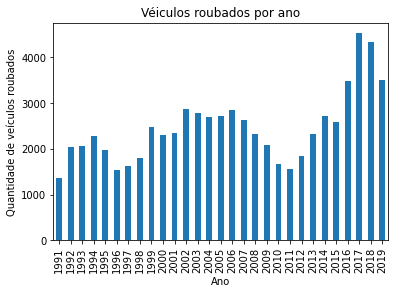

In [ ]:
# Plotando um gráfico de barras 
media_roubo_veiculo_ano.plot(kind='bar')
plt.xlabel('Ano')
plt.ylabel('Quantidade de veículos roubados')
plt.title('Véiculos roubados por ano')
plt.show()

De acordo com o gráfico , podemos ver que esse crime vem crescendo cada vez mais ao longo dos anos. 

Agora vamos analisar quantos carros são `furtados`.

In [ ]:
media_furtos = df['furto_veiculos'].mean()
print(round(media_furtos,2))

1674.67


Em relação aos furtos , os numeros são bem menores , porém ainda altos. `1674.67` é a média de veiculos furtados por mês , vamos olhar durante os anos.

In [ ]:
media_furtos_ano = df.groupby('vano')['furto_veiculos'].mean().round(2)

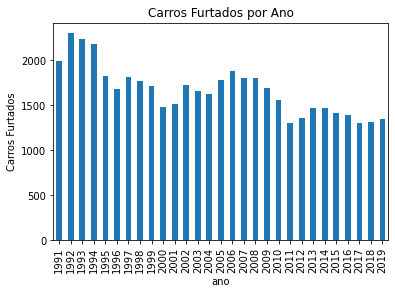

In [ ]:
media_furtos_ano.plot(kind='bar')
plt.xlabel('ano')
plt.ylabel('Carros Furtados')
plt.title('Carros Furtados por Ano')
plt.show()

De acordo com os gráficos , os casos de carros **roubados** estão crescendo a cada ano que passa. Já o de Furtos mostrou totalmente o contrário , ou seja , os **furtos** de carro vem diminuindo cada vez mais.

## Crimes de tentativa de homicídio

Nessa seção falaremos sobre as tentativas de homicídios que estão registrados no nosso dataset

In [ ]:
# Verificando a média de tentativa de homícidos
media_tent_homi = df['tentat_hom'].mean()
print(round(media_tent_homi,2))

318.27


In [ ]:
# Valores maxímos e minímos de tentativas de homícidios
maximo_tent_hom = df['tentat_hom'].max()
minimo_tent_hom = df['tentat_hom'].min()

#imprimindo
print('min:{}'.format(minimo_tent_hom))
print('max:{}'.format(maximo_tent_hom))

min:122
max:645


Acima podemos ver que no mês com menor número de casos foram registrados 122 tetativas de homicídios 

Em relação ao mês com números mais elevado, houveram 831 tentativas de homicídios.

Vamos investigar um pouco mais a fundo essas entradas.

In [ ]:
# Verificando o min
df[df.tentat_hom == 122]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
32,1993,9,572,NaN,19,NaN,122,2566,NaN,NaN,NaN,297,217,2058,143,787,362,14,NaN,NaN,NaN,NaN,NaN,98,3976,2354,580,NaN,NaN,NaN,3349,6283,NaN,NaN,NaN,NaN,126,NaN,NaN,NaN,1007,NaN,NaN,NaN,NaN,NaN,NaN,47,NaN,NaN,NaN,591,1149,2058,NaN,3
40,1994,5,621,NaN,24,NaN,122,2839,NaN,NaN,NaN,371,225,2589,139,981,481,22,NaN,NaN,NaN,NaN,NaN,180,4988,2548,488,NaN,NaN,NaN,3221,6257,NaN,NaN,NaN,NaN,169,NaN,NaN,NaN,1410,NaN,NaN,NaN,NaN,NaN,NaN,66,NaN,NaN,NaN,645,1462,2589,NaN,3


In [ ]:
# Verificando o max 
df[df.tentat_hom == 645]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
287,2014,12,408,6.0,16,38.0,645,7604,427.0,153.0,3916.0,601,97,2830,787,6363,711,0,5.0,759.0,4.0,139.0,0.0,1164,13460,1426,2834,872.0,1259.0,0.0,8377,14768,0.0,125.0,22.0,2639.0,2224,1039.0,1011.0,217.0,1857,2688.0,799.0,1290.0,58.0,7019.0,546.0,39,1.0,0.0,0.0,468,7833,2830,67296.0,3


Infelizmente , de acordo com os dados , a quantidade de tentativa de homicídios aumentaram ao decorrer do tempo.

# Visualização de dados

Visualização de dados são bem importantes e poderosas para explicar algumas variáveis no nosso conjunto de dados. As vezes faremos alguma apresentação com dados e a melhor forma de mostrar isso é visualmente através de gráficos. Nessa seção irei mostrar alguns tipos de gráficos que podemos usar.

## Histograma de homicídio doloso

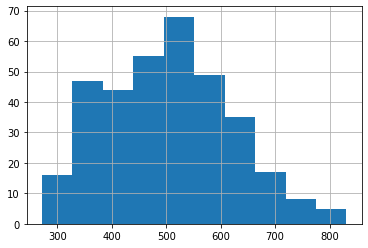

In [ ]:
df.hom_doloso.hist();

Podemos analisar no gráfico acima que:

*   Houveram quase 70 meses com 500-550 homicídios dolosos registrados ao longo do período em estudo.
*   Houveram menos de 10 meses ao longo de todo o período estudado na casa de 800 registros de homicídio doloso.



## Gráfico de linhas roubo de residência

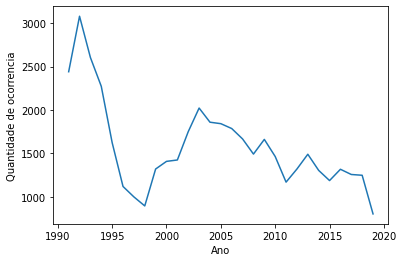

In [ ]:

df.groupby('vano')['roubo_residencia'].sum().plot()
plt.xlabel('Ano')
plt.ylabel('Quantidade de ocorrencia')
plt.show()

Bom , podemos concluir que os roubos de residência vem descendo de acordo com o tempo , poréma ainda continua alto

#Conclusão 

A principal conclusão que tiramos foi a necessidade de prestar atenção em cada detalhe do dataset , pois como trabalhamos com dados reais muitas vezes não estão perfeitos iguais de cursos ou de competições.
Por isso , a etapa de extração dos dados , tratamento e limpeza dos dados e exploração dos dados são as partes que mais vai consumir o tempo do nosso projeto , ou seja , sempre é bom dedicar um bom tempo para essas fases. 